### instalar dependencias

In [1]:
!pip install smart-open
!pip install --upgrade gensim   
!pip install nltk
!pip install pyLDAvis
!pip install pandas

Requirement already up-to-date: gensim in c:\users\analistanegb2b\anaconda3\lib\site-packages (4.0.1)
Processing c:\users\analistanegb2b\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a\pyldavis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)


In [2]:
import pandas as pd
pd.__version__

'1.2.4'

In [3]:
#importar librerías
import pandas as pd
import numpy as np
import nltk
import re

In [4]:
# settings en nltk: tokenizador y stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AnalistaNegB2B\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AnalistaNegB2B\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import pickle 
import random

In [6]:
# Mostrar la ruta del archivo indiferente del sistema operativo
import os
os.getcwd()

'C:\\Users\\AnalistaNegB2B\\Desktop\\Analista Negocios B2B\\DVJ\\Maestria Ciencias de los Datos y Analitica\\2021-1\\PROYECTO INTEGRADOR\\proy-segmentacion\\jupyter\\CRojas04'

In [108]:
main_path="C:\\Users\\rojasd\\Desktop\\CAOBA\\Repositorios\\proy-segmentacion\\"
data_path="data\\"

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
os.chdir(main_path + data_path)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
data2=pickle.load( open(r'Fuente_2_vista_minable.pickle', "rb" ) )
data2.head()

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nit,entidad_matriz,year,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,ref_contrato,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,CD - 003,2019-01-09 18:06:28.570000000,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,CRE-MT-SDS-016-2019,2018-12-29 01:24:49.073000000,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,004-2019,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,015-2019,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,017-2019,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ..."


In [111]:
# Renombrar las columnas 
data2  = data2.rename(columns={
     'year':                        "periodo", 
     
     
})

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
print(list(data2.columns))

['nit', 'entidad_matriz', 'periodo', 'entidad', 'localizacion', 'localizacion_desc', 'mision_vision', 'pers_estrategica', 'ppto_global', 'mes_proyectado', 'precio_base', 'date_last_publication', 'ref_contrato', 'date_publised', 'modalidad', 'contacto', 'cod_producto', 'nombre_producto', 'cod_clase', 'nombre_clase', 'cod_familia', 'nombre_familia']


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
data2.shape

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(349682, 22)

### Tokenización

In [119]:
# función general para preparación de datos: tokenización, remoción caracteres especiales
# minusculas.... no incluido stemming y lematización.
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    return tokens

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
from nltk.tokenize import sent_tokenize

text=str(data2["mision_vision"])
tokenized_sent= sent_tokenize(text)
print(tokenized_sent)

['22        MISION: Proveer los instrumentos necesarios pa...\n41        MISIÓN: Prestar servicio efectivo a la comunid...\n75        Bomberos de Bucaramanga es una Institución Pub...\n76        Bomberos de Bucaramanga es una Institución Pub...\n77        Bomberos de Bucaramanga es una Institución Pub...\n                                ...                        \n863960    La Subred Integrada de servicios de Salud Sur ...\n863961    La Subred Integrada de servicios de Salud Sur ...\n863962    La Subred Integrada de servicios de Salud Sur ...\n863963    La Subred Integrada de servicios de Salud Sur ...\n863968    Contribuir a la calidad de vida de nuestros us...\nName: mision_vision, Length: 349682, dtype: object']


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
tokens = [t for t in text.split()]

freq = nltk.FreqDist(tokens)


for key,val in freq.items():

    print (str(key) + ':' + str(val))

22:1
MISION::1
Proveer:1
los:1
instrumentos:1
necesarios:1
pa...:1
41:1
MISIÓN::1
Prestar:1
servicio:1
efectivo:1
a:2
la:2
comunid...:1
75:1
Bomberos:3
de:13
Bucaramanga:3
es:3
una:3
Institución:3
Pub...:3
76:1
77:1
...:5
863960:1
La:4
Subred:4
Integrada:4
servicios:4
Salud:4
Sur:4
863961:1
863962:1
863963:1
863968:1
Contribuir:1
calidad:1
vida:1
nuestros:1
us...:1
Name::1
mision_vision,:1
Length::1
349682,:1
dtype::1
object:1


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


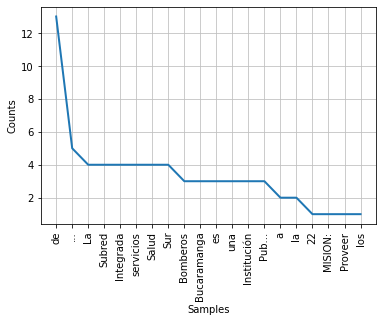

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [122]:
freq.plot(20, cumulative=False)

In [123]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = stopwords.words('spanish')

clean_tokens = tokens[:]

sr = stopwords.words('spanish')

for token in tokens:

    if token in stopwords.words('spanish'):

        clean_tokens.remove(token)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rojasd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = stopwords.words('spanish')

clean_tokens = tokens[:]

sr = stopwords.words('spanish')

for token in tokens:

    if token in ["La", "o", "la", "del", "de", "es"]  :

        clean_tokens.remove(token)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rojasd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
freq2 = nltk.FreqDist(clean_tokens)


for key,val in freq.items():

    print (str(key) + ':' + str(val))

0:1
MISIÓN:1
\n\nAl:1
municipio:1
de:5
Güepsa:1
como:3
entidad...:1
1:1
MISION:Somos:1
una:2
entidad:2
carácter:1
público,:1
...:3
2:1
Ser:1
reconocida:1
territorial:1
l...:1
3:1
Misión::4
Administrar:1
las:1
áreas:1
del:3
Sistema:1
P...:1
4:1
MISION::1
La:5
Institución:1
Educativa:1
forma:1
integra...:1
2080:1
misión:2
INVIAS,:2
es:3
ejecutar:2
políticas,:2
e...:2
2081:1
Ejercer:1
la:3
rectoría:1
y:1
coordinación:1
2082:1
Secretaría:1
Distrital:1
Ambiente:1
auto...:1
2083:1
Alcaldia:1
Ibagué:1
ent...:1
2084:1
Name::1
mision_vision,:1
Length::1
2085,:1
dtype::1
object:1


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


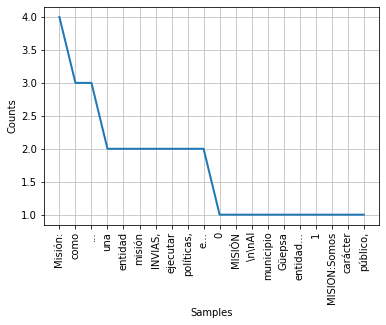

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [125]:
freq2.plot(20,cumulative=False)

#### Stemming

In [126]:
#stemming

words  = nltk.tokenize.WhitespaceTokenizer().tokenize(str(data2))
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)
#porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)
#SnowBall stemmer
snowballStemmedWords = [nltk.stem.SnowballStemmer("spanish").stem(word) for word in words]
df['SnowballStemmedWords'] = pd.Series(snowballStemmedWords)
df

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,OriginalWords,PorterStemmedWords,SnowballStemmedWords
0,nit,nit,nit
1,entidad_matriz,entidad_matriz,entidad_matriz
2,periodo,periodo,period
3,\,\,\
4,22,22,22
...,...,...,...
765,[349682,[349682,[349682
766,rows,row,rows
767,x,x,x
768,22,22,22


#### Lematización

In [128]:
from nltk.stem.wordnet import WordNetLemmatizer
lem= WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "misiones"
print("lemmatized word:", lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

lemmatized word: misiones
Stemmed Word: mision


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(str(data2))
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)
#WordNet Lemmatization
wordNetLemmatizedWords = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
df['WordNetLemmatizer'] = pd.Series(wordNetLemmatizedWords)
df

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,OriginalWords,WordNetLemmatizer
0,nit,nit
1,entidad_matriz,entidad_matriz
2,periodo,periodo
3,\,\
4,22,22
...,...,...
765,[349682,[349682
766,rows,row
767,x,x
768,22,22


### LDA

In [130]:
# función general para preparación de datos: tokenización, remoción caracteres especiales
# minusculas.... no incluido stemming y lematización.
def textprep(line):
    tokens = nltk.word_tokenize(str(line))
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w for w in tokens if w not in stop_words_nltk] 
    return tokens

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
# creación de columna con tokenización de una columna de interés especifica
data2['tokens_pers_estrategica'] = data2.apply(lambda row: textprep(row['pers_estrategica']), axis=1)
data2.head()

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nit,entidad_matriz,periodo,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,date_publised,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,tokens_pers_estrategica
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,2019-01-09 18:06:28.570000000,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,"[lograr, estructuracin, plan, compras, 2019, m..."
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,2018-12-29 01:24:49.073000000,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,"[alcalda, municipal, tauramena, casanare, obje..."
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli..."
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli..."
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,2019-01-11 15:10:41.077000000,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli..."


### Construir el BoW (diccionario) de términos

In [132]:
# Creación del BoW - en gensim es Dictionary
from gensim.corpora import Dictionary
dictionary = Dictionary(data2.tokens_pers_estrategica)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in data2.tokens_pers_estrategica]

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### no correr archivo pesado

In [72]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(6, 1), (18, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(2, 1), (22, 1), (42, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1)], [(25, 2), (57, 1), (68, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (10

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
print(dictionary)

Dictionary(5703 unique tokens: ['2019', 'acorde', 'compras', 'desarrollo', 'ejecucin']...)


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



### Construir matriz de documentos vs términos

In [135]:
# libreria para paralelizar
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in data2.tokens_pers_estrategica])
pool.close()
print(time.time()-t0)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14.66664171218872


In [159]:
doc_term_matrix

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(3, 1),
  (9, 1),
  (10, 1),
  (27, 1),
  (31, 1),
  (36, 1),
  (50, 1),
  (58, 1),
  (61, 1),
  (78, 1),
  (89, 2),
  (122, 1),
  (147, 1),
  (196, 1),
  (206, 2),
  (216, 1),
  (224, 1),
  (229, 1),
  (268, 1),
  (415, 1),
  (419, 1),
  (447, 1),
  (448, 1),
  (470, 1),
  (523, 1),
  (642, 1),
  (718, 1),
  (877, 1),
  (1011, 1),
  (1050, 2),
  (1076, 1),
  (1090, 1),
  (1286, 1),
  (1555, 1),
  (1600, 1),
  (1615, 1),
  (1634, 1),
  (1924, 1),
  (2600, 1),
  (2694, 1),
  (3172, 1),
  (3758, 1),
  (3793, 1),
  (3867, 1),
  (4565, 1),
  (5072, 1)],
 [(27, 1),
  (59, 1),
  (63, 1),
  (75, 1),
  (78, 1),
  (89, 1),
  (100, 1),
  (116, 1),
  (230, 1),
  (258, 1),
  (268, 1),
  (357, 1),
  (446, 1),
  (451, 1),
  (523, 1),
  (618, 1),
  (674, 1),
  (806, 1),
  (814, 1),
  (1079, 1),
  (1086, 1),
  (1146, 1),
  (1500, 1),
  (1634, 1),
  (2524, 1),
  (3853, 1),
  (4642, 1)],
 [(25, 3),
  (56, 1),
  (59, 1),
  (64, 1),
  (72, 2),
  (78, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (89, 4),
  (10

### Construir modelo LDA

In [136]:
from gensim.models.ldamulticore import LdaMulticore

t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10, workers=10)
print(time.time()-t0)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


133.20794892311096


In [137]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    #vector = max(vector,key=lambda item: item[1])
    return vector

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
data2['topics'] = data2.apply(lambda row: assigntopic(row['tokens_pers_estrategica']), axis=1)
data2.head()

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nit,entidad_matriz,periodo,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,modalidad,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,tokens_pers_estrategica,topics
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,CCE-16-Servicios_profesionales_gestion,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,"[lograr, estructuracin, plan, compras, 2019, m...","[(10, 0.38127646), (12, 0.36743808), (11, 0.19..."
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,CCE-06-Seleccion_Abreviada_Menor_Cuantia,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,"[alcalda, municipal, tauramena, casanare, obje...","[(9, 0.25022444), (4, 0.13429956), (12, 0.1056..."
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.46364185), (14, 0.12351042), (10, 0.115..."
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.46364284), (14, 0.123510525), (10, 0.11..."
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,CCE-16-Servicios_profesionales_gestion,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.4636408), (14, 0.123512134), (10, 0.116..."


Ejemplos de tópicos del modelo

In [139]:
# Mostrar los términos y sus pesos de un documento
print(list(lda_model[doc_term_matrix[0]]))



[(10, 0.38129324), (11, 0.19815601), (12, 0.367393)]


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
print (lda_model)

LdaModel(num_terms=5703, num_topics=20, decay=0.5, chunksize=2000)


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
# Mostrar los términos más relevantes de los tópicos más relevantes tópico y sus pesos
print(lda_model.print_topics(num_topics=10, num_words=5))

[(16, '0.081*"aos" + 0.066*"compromiso" + 0.055*"pblico" + 0.051*"ciudadana" + 0.050*"valores"'), (13, '0.068*"comunicacin" + 0.060*"vulnerables" + 0.055*"programas" + 0.049*"basado" + 0.041*"buen"'), (5, '0.071*"cultura" + 0.070*"medio" + 0.070*"democrtica" + 0.069*"eficiente" + 0.065*"seguridad"'), (9, '0.056*"mejorar" + 0.055*"calidad" + 0.040*"sector" + 0.038*"educacin" + 0.029*"desarrollo"'), (18, '0.047*"mejorar" + 0.046*"gestin" + 0.035*"fortalecer" + 0.034*"mejoramiento" + 0.029*"desarrollar"'), (12, '0.055*"plan" + 0.050*"estratgico" + 0.036*"realizara" + 0.029*"gestin" + 0.022*"comunidad"'), (19, '0.070*"infraestructura" + 0.069*"nacional" + 0.036*"transporte" + 0.035*"programas" + 0.035*"ministerio"'), (15, '0.093*"bogot" + 0.057*"presupuesto" + 0.053*"personal" + 0.052*"cuenta" + 0.047*"planta"'), (10, '0.065*"gestin" + 0.035*"institucional" + 0.029*"social" + 0.025*"acciones" + 0.023*"control"'), (3, '0.031*"distrito" + 0.029*"cumplimiento" + 0.027*"proveer" + 0.026*"proce

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda_model[corpus]]

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualización de todos los tópicos

In [144]:
import pyLDAvis.gensim_models as gensim
import pyLDAvis

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics = False)
print(time.time()-t0)
vis

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


47.34819269180298


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.155501 -0.035025       1        1   2.632605
1      0.102609 -0.253995       2        1   1.830433
2     -0.021896  0.106053       3        1   2.956845
3      0.024764  0.181067       4        1   3.098799
4     -0.127785  0.011339       5        1   1.295687
5     -0.099770 -0.284581       6        1   1.796448
6      0.114473 -0.052099       7        1   3.234901
7      0.217693 -0.052693       8        1   5.607174
8     -0.109403  0.046238       9        1   1.236082
9      0.262008 -0.073137      10        1   4.396349
10     0.129806  0.075027      11        1   4.908510
11    -0.097953 -0.055487      12        1   4.651563
12     0.019230  0.198834      13        1   3.666633
13    -0.148375  0.114772      14        1   1.992883
14    -0.036412  0.144383      15        1   2.647513
15    -0.034860  0.008894      16        1   2.233021
16     0.036443 -0.087672      17        1   4.807337
17    -0.201270 -0.141711      18        1   3.066716
18     0.106029  0.166041      19        1   5.204688
19    -0.290833 -0.016249      20        1  38.735814, topic_info=          Term           Freq          Total Category  logprob  loglift
501       vial  198347.000000  198347.000000  Default  30.0000  30.0000
495  programas  206220.000000  206220.000000  Default  29.0000  29.0000
674   nacional  387780.000000  387780.000000  Default  28.0000  28.0000
524     objeto  187036.000000  187036.000000  Default  27.0000  27.0000
359      salud   72950.000000   72950.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
632   amigable       0.091334   13910.600776  Topic20 -17.8458 -10.9852
57       medio       0.092268   18036.167153  Topic20 -17.8356 -11.2348
130       ejes       0.091589   15013.491517  Topic20 -17.8430 -11.0587
192       agua       0.091897   17000.795092  Topic20 -17.8396 -11.1797
224        ser       0.093174   62446.066466  Topic20 -17.8258 -12.4669

[1229 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
450      10  0.999668               1
451      10  0.999849              10
451      17  0.000069              10
1549     13  0.998846             100
452      10  0.999865              11
...     ...       ...             ...
532       6  0.987235        voluntad
1848     14  0.992655      voluntario
257       3  0.998676  vulnerabilidad
257      11  0.001185  vulnerabilidad
533      14  0.999914     vulnerables

[3340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

### Guardar la visualización en un archivo HTML 

In [145]:
pyLDAvis.save_html(vis, 'lda_visualizationestrategica.html')

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Misión_visión

In [146]:
# creación de columna con tokenización de una columna de interés especifica # 3 minutos y 30 segundos Cargando
data2['tokens_mision_vision'] = data2.apply(lambda row: textprep(row['mision_vision']), axis=1)
data2.head()

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nit,entidad_matriz,periodo,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,contacto,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,tokens_pers_estrategica,topics,tokens_mision_vision
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,Monica Andrea Hernandez Salinas,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,"[lograr, estructuracin, plan, compras, 2019, m...","[(10, 0.38127646), (12, 0.36743808), (11, 0.19...","[mision, proveer, instrumentos, necesarios, sa..."
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,MARIA EUGENIA RODRIGUEZ FIGUEREDO,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,"[alcalda, municipal, tauramena, casanare, obje...","[(9, 0.25022444), (4, 0.13429956), (12, 0.1056...","[misin, prestar, servicio, efectivo, comunidad..."
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,AMANDA LUCIA BARCENAS MANTILLA,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.46364185), (14, 0.12351042), (10, 0.115...","[bomberos, bucaramanga, institucin, publica, d..."
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.46364284), (14, 0.123510525), (10, 0.11...","[bomberos, bucaramanga, institucin, publica, d..."
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,AMANDA LUCIA BARCENAS MANTILLA,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.4636408), (14, 0.123512134), (10, 0.116...","[bomberos, bucaramanga, institucin, publica, d..."


In [147]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in data2.tokens_mision_vision]

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
# libreria para paralelizar
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [sentence for sentence in data2.tokens_mision_vision])
pool.close()
print(time.time()-t0)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15.44970417022705


In [149]:
from gensim.models.ldamulticore import LdaMulticore 
#3 minutos cargando
t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10, workers=10)
print(time.time()-t0)

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165.22192692756653


In [150]:
def assigntopic(doc):
    vector = lda_model[dictionary.doc2bow(doc)] 
    # opción 1: todos los tópicos ordenados de mayor a menor, podria ser topN tambien asi: return vector[:5] n=5
    vector = sorted(vector, key=lambda item: -item[1])
    # opción 2: asignar el tópico mayor a cada documento
    #vector = max(vector,key=lambda item: item[1])
    return vector

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
data2['topics2'] = data2.apply(lambda row: assigntopic(row['tokens_mision_vision']), axis=1)
data2.head()
#1 minuto y medio cargado

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nit,entidad_matriz,periodo,entidad,localizacion,localizacion_desc,mision_vision,pers_estrategica,ppto_global,mes_proyectado,...,cod_producto,nombre_producto,cod_clase,nombre_clase,cod_familia,nombre_familia,tokens_pers_estrategica,topics,tokens_mision_vision,topics2
22,800010350,ALCALDIA MUNICIPAL DE MURILLO,2019,ALCALDIA MUNICIPAL DE MURILLO,CO-TOL-73461,Tolima,MISION: Proveer los instrumentos necesarios pa...,Lograr la estructuración del plan de compras 2...,2971812351,Enero,...,V1.80111620,Servicios temporales de recursos humanos,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,"[lograr, estructuracin, plan, compras, 2019, m...","[(10, 0.38127646), (12, 0.36743808), (11, 0.19...","[mision, proveer, instrumentos, necesarios, sa...","[(11, 0.30170766), (12, 0.22202006), (19, 0.14..."
41,800012873,MUNICIPIO DE TAURAMENA,2019,MUNICIPIO DE TAURAMENA,CO-CAS-85410,Casanare,MISIÓN: Prestar servicio efectivo a la comunid...,"La Alcaldía municipal de Tauramena Casanare, t...",114339387326,Julio,...,V1.93141506,Servicios de bienestar social,V1.93141500,Desarrollo y servicios sociales,V1.93140000,Servicios comunitarios y sociales,"[alcalda, municipal, tauramena, casanare, obje...","[(9, 0.25022444), (4, 0.13429956), (12, 0.1056...","[misin, prestar, servicio, efectivo, comunidad...","[(12, 0.3296085), (2, 0.2244128), (11, 0.19084..."
75,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,V1.80111500,Desarrollo de recursos humanos,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.46364185), (14, 0.12351042), (10, 0.115...","[bomberos, bucaramanga, institucin, publica, d...","[(13, 0.22694443), (5, 0.22494116), (1, 0.1724..."
76,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.46364284), (14, 0.123510525), (10, 0.11...","[bomberos, bucaramanga, institucin, publica, d...","[(13, 0.2269502), (5, 0.2249396), (1, 0.172486..."
77,800022620,BOMBEROS DE BUCARAMANGA,2019,BOMBEROS DE BUCARAMANGA,CO-SAN-68001,Santander,Bomberos de Bucaramanga es una Institución Pub...,La actividad Bomberil se reconoce como un ser...,10926006500,Enero,...,V1.80111600,Servicios de personal temporal,V1.80110000,Servicios de recursos humanos,V1.80000000,"Servicios de Gestión, Servicios Profesionales ...","[actividad, bomberil, reconoce, servicio, pbli...","[(6, 0.4636408), (14, 0.123512134), (10, 0.116...","[bomberos, bucaramanga, institucin, publica, d...","[(13, 0.22693668), (5, 0.22494344), (1, 0.1724..."


In [152]:
# Mostrar los términos y sus pesos de un documento
print(list(lda_model[doc_term_matrix[0]]))


[(0, 0.026147839), (7, 0.07898645), (10, 0.025254628), (11, 0.30167875), (12, 0.22201698), (14, 0.122069314), (17, 0.040152982), (18, 0.027511831), (19, 0.14491886)]


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
print (lda_model)

LdaModel(num_terms=5703, num_topics=20, decay=0.5, chunksize=2000)


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
# Mostrar los términos más relevantes de los tópicos más relevantes tópico y sus pesos
print(lda_model.print_topics(num_topics=10, num_words=5))

[(9, '0.114*"programas" + 0.076*"vivienda" + 0.069*"polticas" + 0.064*"poltica" + 0.058*"ejecutar"'), (16, '0.034*"polticas" + 0.031*"informacin" + 0.031*"sistema" + 0.021*"tecnologas" + 0.020*"derecho"'), (2, '0.091*"gobierno" + 0.072*"ciudadana" + 0.068*"confiable" + 0.049*"red" + 0.047*"mejoren"'), (8, '0.048*"infraestructura" + 0.046*"vial" + 0.024*"transporte" + 0.024*"nacional" + 0.024*"proyectos"'), (3, '0.059*"unidades" + 0.055*"administrativa" + 0.053*"travs" + 0.050*"contable" + 0.031*"centralizadas"'), (0, '0.033*"ciudadana" + 0.032*"misin" + 0.031*"ibagu" + 0.021*"efectiva" + 0.020*"cultural"'), (6, '0.061*"educacin" + 0.061*"disponibilidad" + 0.044*"nios" + 0.044*"nias" + 0.026*"visin"'), (5, '0.125*"salud" + 0.059*"servicios" + 0.046*"calidad" + 0.038*"integral" + 0.035*"riesgo"'), (12, '0.056*"desarrollo" + 0.037*"municipio" + 0.033*"misin" + 0.031*"visin" + 0.026*"vida"'), (13, '0.032*"nacional" + 0.018*"ambiental" + 0.017*"pas" + 0.016*"ser" + 0.016*"desarrollo"')]


C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda_model[corpus]]

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [157]:
import pyLDAvis.gensim_models as gensim
import pyLDAvis

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics = False)
print(time.time()-t0)
vis

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


54.58562636375427


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.174027  0.028862       1        1   5.623678
1      0.096241  0.005749       2        1   1.383303
2      0.142443  0.174957       3        1   1.139978
3     -0.295832  0.099487       4        1   4.569316
4     -0.082325 -0.081738       5        1   2.018065
5      0.092592 -0.072995       6        1   4.174158
6      0.018759 -0.093520       7        1   2.072983
7     -0.119146 -0.095800       8        1   1.638300
8     -0.102330  0.355397       9        1  47.730407
9     -0.079296  0.236953      10        1   1.512849
10     0.131449 -0.084252      11        1   3.085419
11    -0.092954 -0.091535      12        1   1.411851
12     0.143176 -0.082414      13        1   3.646450
13    -0.028508 -0.139741      14        1   5.706841
14    -0.247012 -0.134031      15        1   1.085407
15    -0.050612 -0.054803      16        1   1.592077
16    -0.003782  0.050816      17        1   2.042835
17     0.230966  0.111748      18        1   3.266111
18     0.004142 -0.037562      19        1   3.326607
19     0.068005 -0.095577      20        1   2.973368, topic_info=            Term           Freq          Total Category  logprob  loglift
281     gobierno  194877.000000  194877.000000  Default  30.0000  30.0000
495    programas  220598.000000  220598.000000  Default  29.0000  29.0000
201     ejecutar  190417.000000  190417.000000  Default  28.0000  28.0000
1912         red  185182.000000  185182.000000  Default  27.0000  27.0000
391     polticas  221486.000000  221486.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
69      promocin    4754.474932   22892.765090  Topic20  -4.6048   1.9437
408    generacin    6187.895788  186463.689716  Topic20  -4.3413   0.1098
66      poblacin    4906.685370   37325.841110  Topic20  -4.5733   1.4864
1660  transporte    5219.097846  190641.428882  Topic20  -4.5115  -0.0826
100       gestin    4465.686698   88629.361589  Topic20  -4.6675   0.5274

[1211 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4447     14  0.999186            
452      11  0.844688          11
452      13  0.154752          11
2452     18  0.996431        2014
1898     18  0.991594        2015
...     ...       ...         ...
4395      7  0.668517       vivir
4395     19  0.331355       vivir
2286     14  0.999282     vocacin
507      18  0.998546  vulnerable
4464      3  0.998081        xito

[3156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [158]:
pyLDAvis.save_html(vis, 'lda_visualizationmisiovision.html')

C:\Users\rojasd\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
